In [28]:
# Potrzebne importy
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [29]:
doc_n: str = "command_files"
analisys_data_file_path = os.getcwd()[:-len(doc_n)] + "analysis_data/analisys_data.csv"

df_slaskie = pd.read_csv(analisys_data_file_path, index_col=0)
df_slaskie.iloc[:, :]


,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,10,Beko,33.0,M,1.5
1,3,Tefal,NaN,M,3.5
2,9,Samsung,44.0,M,2.5
3,5,Samsung,40.0,M,0.5
4,2,Samsung,48.0,M,3.0
...,...,...,...,...,...
448,6,Beko,40.0,M,2.0
449,3,Tefal,37.0,M,0.5
450,4,Dyson,41.0,M,3.0
451,4,Tefal,27.0,M,1.5


In [30]:
# Informacje od dataframie
df_slaskie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 452
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dni od zakupu    453 non-null    int64  
 1   Marka            453 non-null    object 
 2   Wiek kupującego  402 non-null    float64
 3   Płeć kupującego  452 non-null    object 
 4   Ocena            453 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 21.2+ KB


In [31]:
# Podstawowy opis calego DataFramu
df_slaskie.describe()

,Dni od zakupu,Wiek kupującego,Ocena
count,453.000000,402.000000,453.000000
mean,7.030905,40.592040,2.368653
std,2.509966,9.683147,0.987684
min,1.000000,18.000000,0.500000
25%,5.000000,34.000000,1.500000
50%,7.000000,40.000000,2.000000
75%,9.000000,47.750000,3.000000
max,15.000000,66.000000,5.000000


In [32]:
data_appendix_file_path = os.getcwd()[:-len(doc_n)] + "documents/diagrams"
print(data_appendix_file_path)

/home/mbiela/Documents/AiBD/laboratorium-6-Marcin279/documents/diagrams


In [33]:
facecolor = '#EAEAEA'
color_bars = '#EAEAEA'

In [34]:
def plot_hist(df: pd.DataFrame, column: str, bins: int,
              title: str, x_label: str, y_label: str,
              alpha: float =0.8, rwidth: float=0.9):
              
    fig, ax = plt.subplots(figsize=(15, 10))
    n, bins, patches = ax.hist(df[column], bins=bins, alpha=alpha, rwidth=rwidth)
    plt.grid()
    plt.title(title, fontsize=25)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    fig.savefig(data_appendix_file_path + f"/{title}.png")
    plt.show()

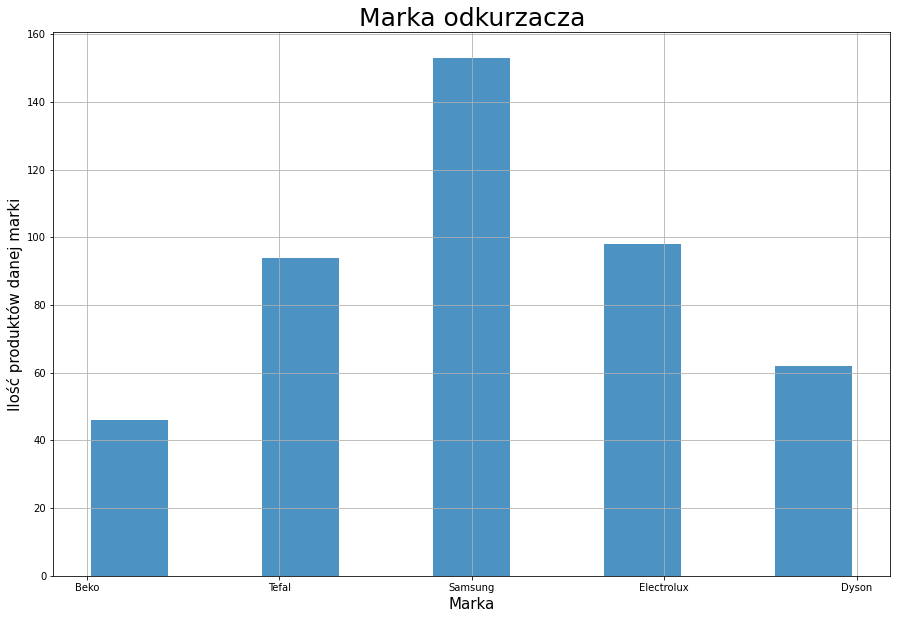

Samsung       153
Electrolux     98
Tefal          94
Dyson          62
Beko           46
Name: Marka, dtype: int64


In [35]:
plot_hist(df_slaskie, 'Marka', bins=9, title="Marka odkurzacza", x_label="Marka", y_label="Ilość produktów danej marki")

print(df_slaskie.Marka.value_counts())

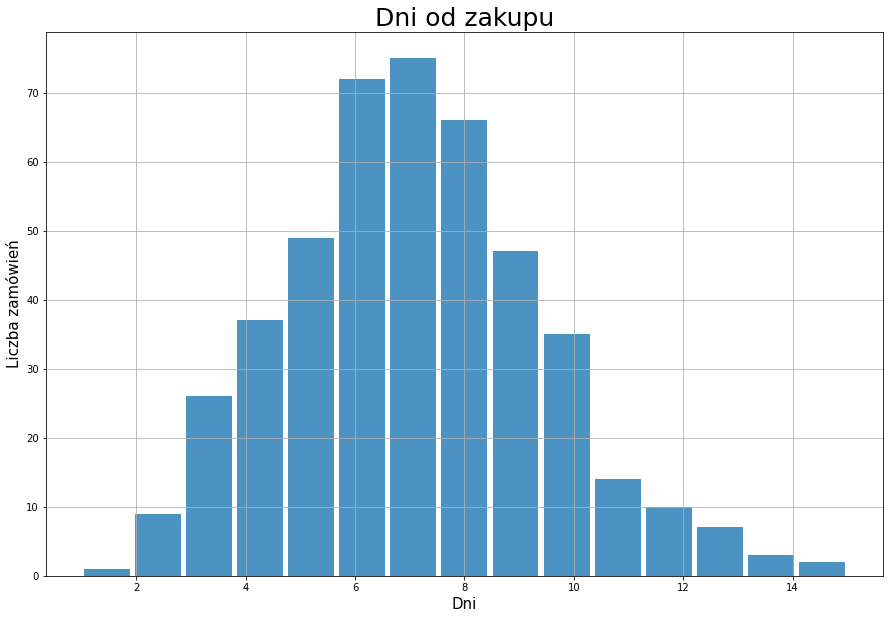

7     75
6     72
8     66
5     49
9     47
4     37
10    35
3     26
11    14
12    10
2      9
13     7
14     3
15     2
1      1
Name: Dni od zakupu, dtype: int64


In [36]:
plot_hist(df_slaskie, "Dni od zakupu", bins=15, title="Dni od zakupu", x_label="Dni", y_label="Liczba zamówień")

print(df_slaskie["Dni od zakupu"].value_counts())

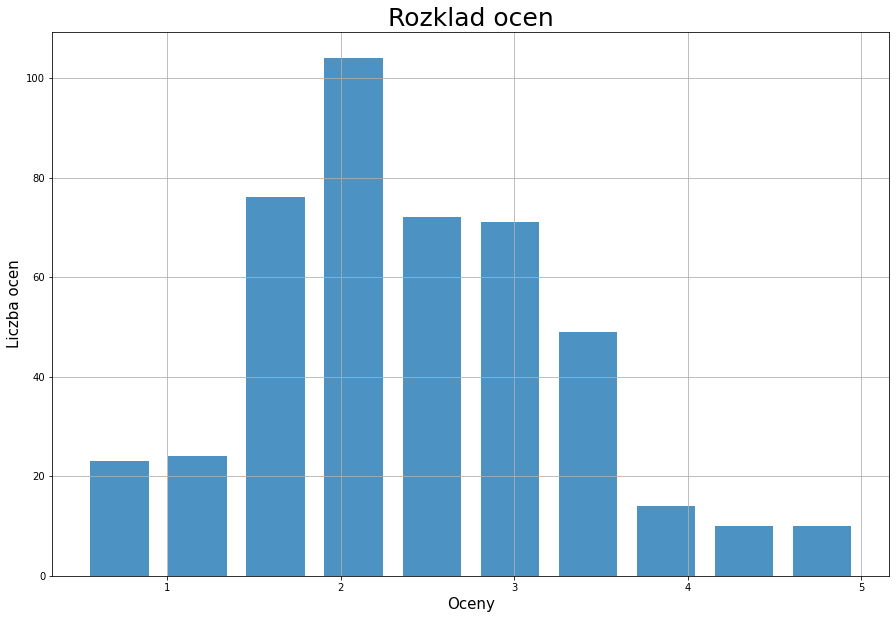

2.0    104
1.5     76
2.5     72
3.0     71
3.5     49
1.0     24
0.5     23
4.0     14
4.5     10
5.0     10
Name: Ocena, dtype: int64


In [37]:
plot_hist(df_slaskie, 'Ocena', bins=10, title="Rozklad ocen", x_label="Oceny", y_label="Liczba ocen", rwidth=0.75)

print(df_slaskie['Ocena'].value_counts())

M    412
K     40
Name: Płeć kupującego, dtype: int64


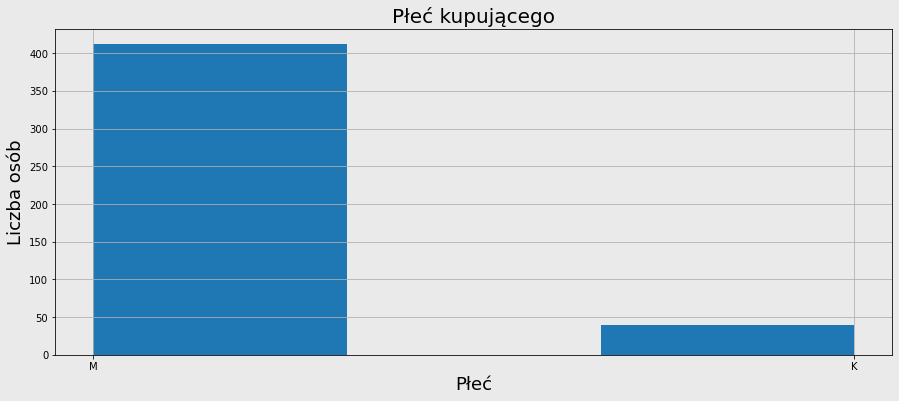

In [38]:
#Płec kupującego
fig, ax = plt.subplots(1, figsize=(15, 6), facecolor=facecolor)
ax.set_facecolor(facecolor)
df_slaskie["Płeć kupującego"].hist(bins=3)
plt.title("Płeć kupującego", fontsize=20)
plt.xlabel("Płeć", fontsize=18)
plt.ylabel("Liczba osób", fontsize=18)
plt.savefig(data_appendix_file_path + "/plec.png")

# plot_hist(df, "Płeć kupującego", bins=2, title="Płeć kupującego", x_label="Płeć", y_label="Liczba osób", rwidth=0.75)
print(df_slaskie["Płeć kupującego"].value_counts())

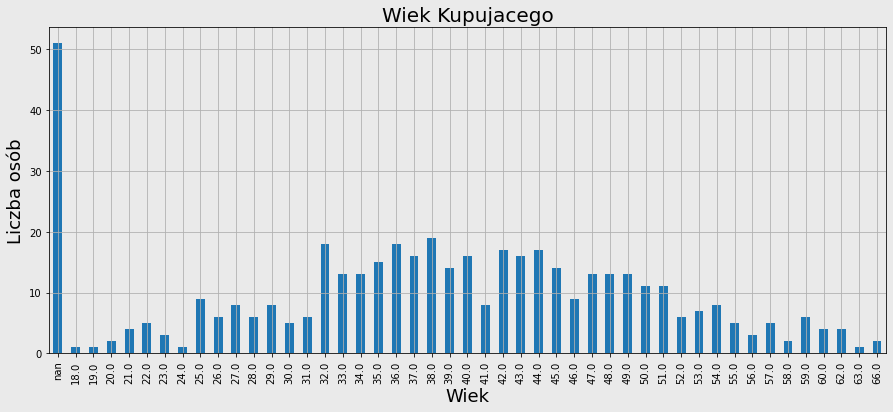

In [39]:
# Wiek Użyłem metody bar zamiast hist ze względu na to aby pokazać liczbę osób, których wieku nie znamy jest to pozycja 'nan'
fig, ax = plt.subplots(1, figsize=(15, 6), facecolor=facecolor)
ax.set_facecolor(facecolor)

wiek_kupujacego = df_slaskie["Wiek kupującego"].value_counts(dropna=False).sort_index(ascending=True, na_position='first')

wiek_kupujacego.plot.bar(grid=True)

plt.title("Wiek Kupujacego", fontsize=20)
plt.xlabel("Wiek", fontsize=18)
plt.ylabel("Liczba osób", fontsize=18)
plt.savefig(data_appendix_file_path + "/wiek_kupujacego.png")

# print(df["Wiek kupującego"].value_counts(dropna=False))

In [40]:
# Wiek Kupujacego osobno dla kazdej z marek

marki = df_slaskie['Marka'].unique().tolist()
marki

['Beko', 'Tefal', 'Samsung', 'Electrolux', 'Dyson']

In [41]:
# Stworzenie listy dataframow ze wzgledu na marke 
df_lst = []

for i in range(0, len(marki)):
    df_marki = df_slaskie.loc[df_slaskie['Marka'] == marki[i]]
    df_lst.append(df_marki)

print(df_lst[1])

     Dni od zakupu  Marka  Wiek kupującego Płeć kupującego  Ocena
1                3  Tefal              NaN               M    3.5
9               10  Tefal             48.0               M    2.5
18               7  Tefal             28.0               M    2.0
20               5  Tefal              NaN               M    2.0
24               9  Tefal             49.0               M    2.0
..             ...    ...              ...             ...    ...
424              5  Tefal             38.0               M    2.0
433              7  Tefal             49.0               K    1.5
445              3  Tefal             39.0               M    1.5
449              3  Tefal             37.0               M    0.5
451              4  Tefal             27.0               M    1.5

[94 rows x 5 columns]


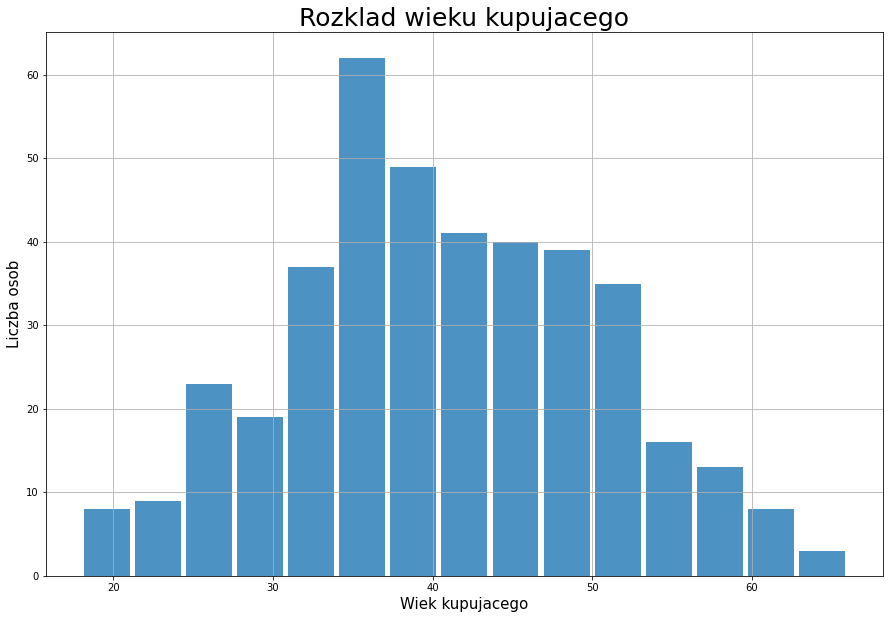

In [42]:
# Stworzenie histogramu dla wszystkich marek zawierajacego rozklad wieku

plot_hist(df_slaskie, 'Wiek kupującego', bins=15,title="Rozklad wieku kupujacego", x_label="Wiek kupujacego", y_label="Liczba osob")


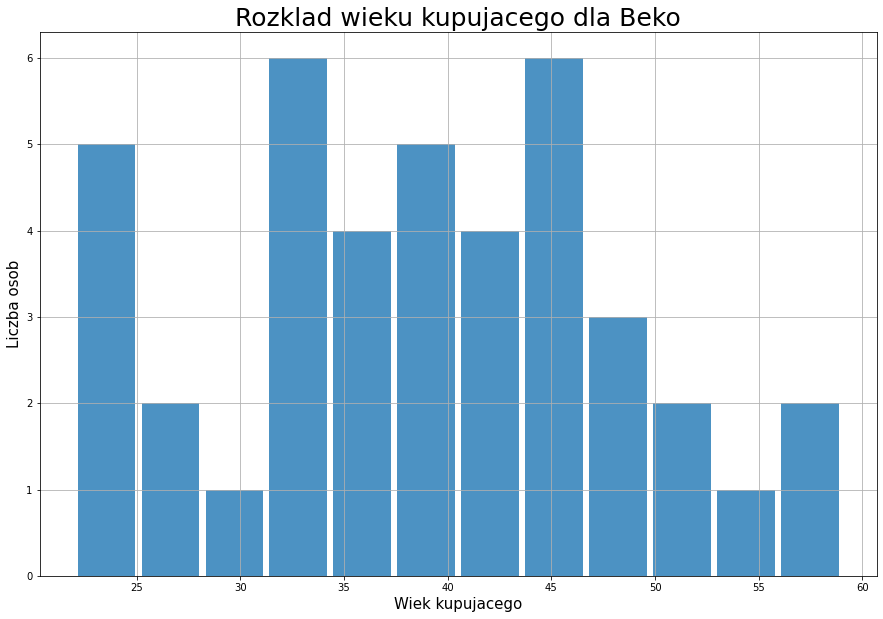

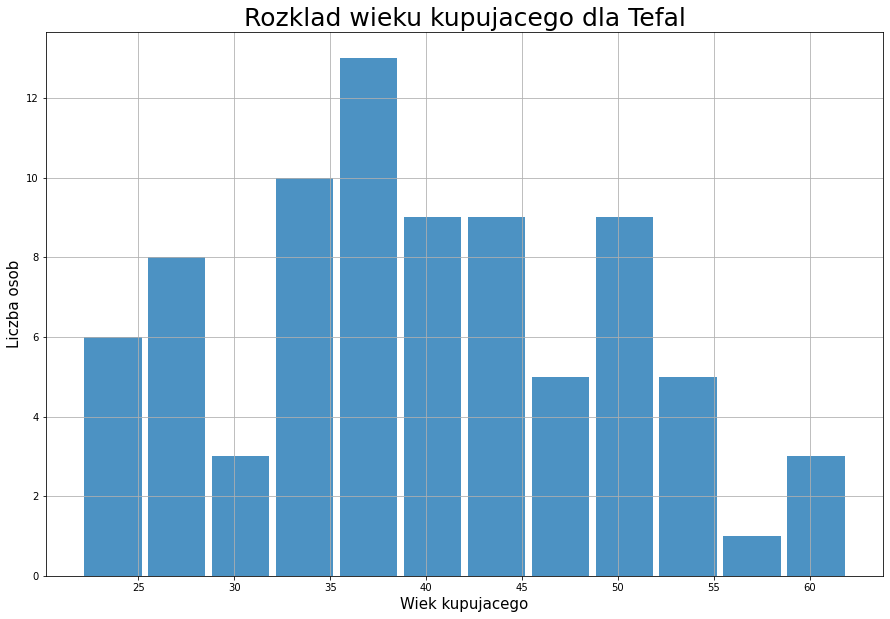

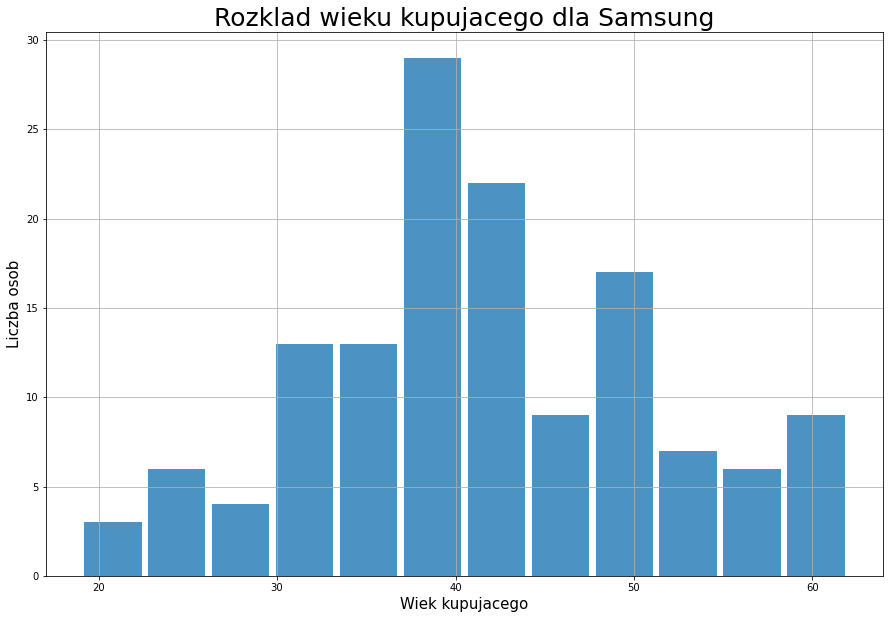

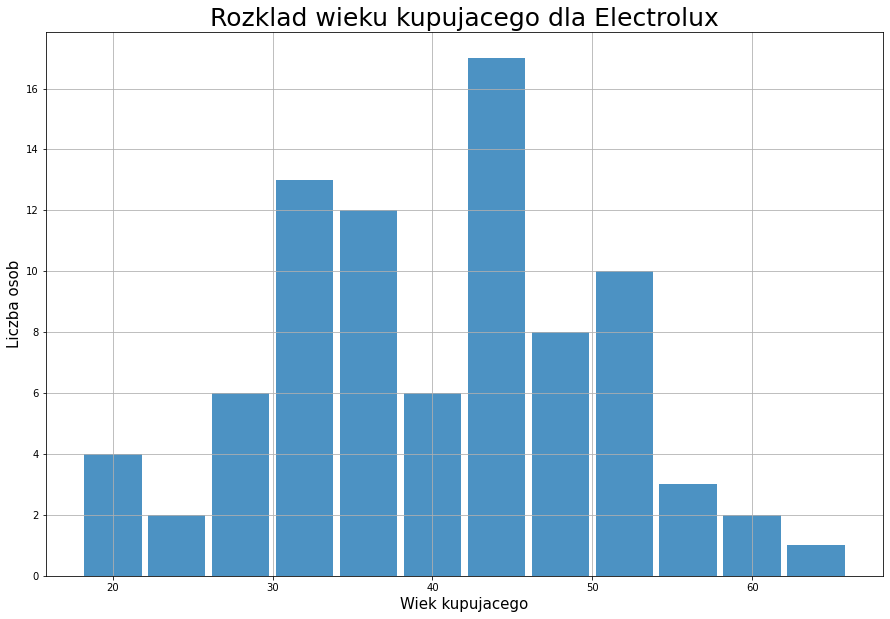

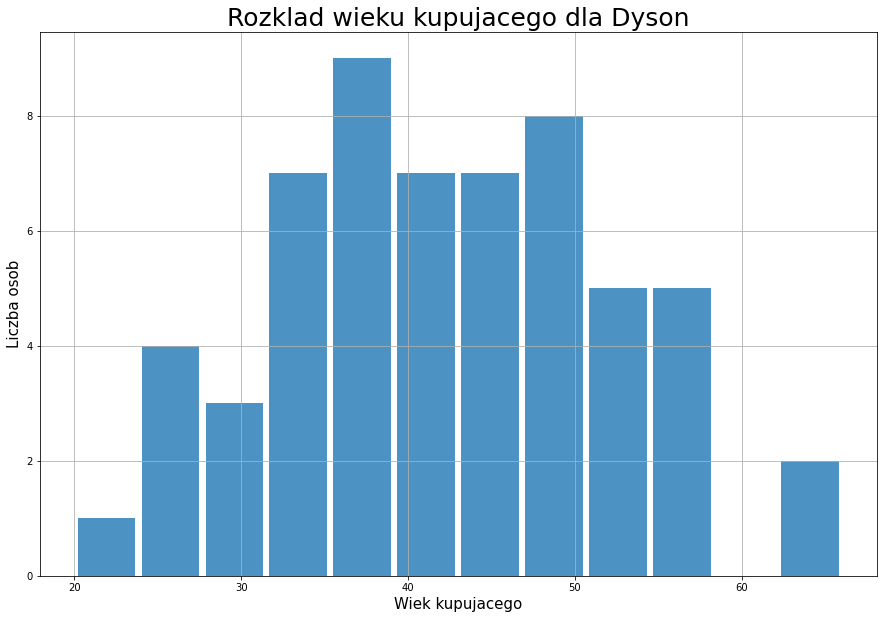

In [43]:
# Histogram dla poszczegolnych marek wg wieku kupujacego

for i in range(0, len(df_lst)):
    plot_hist(df_lst[i], 'Wiek kupującego', bins=12, title=f"Rozklad wieku kupujacego dla {marki[i]}", x_label="Wiek kupujacego", y_label="Liczba osob")

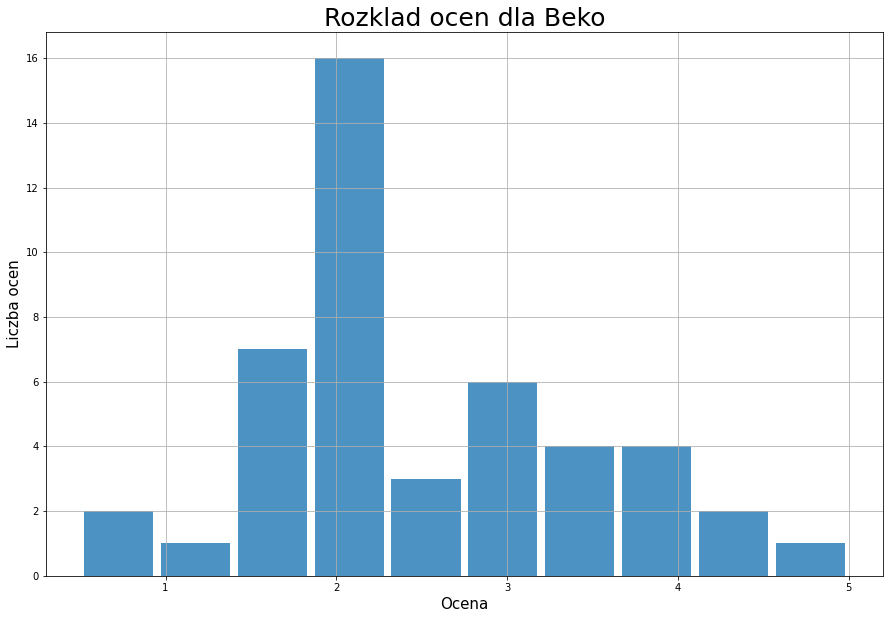

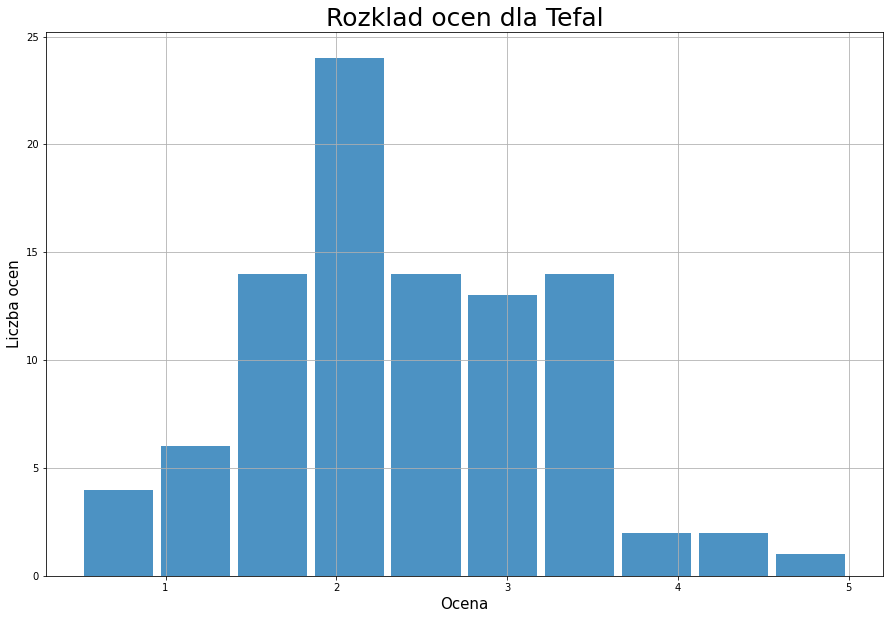

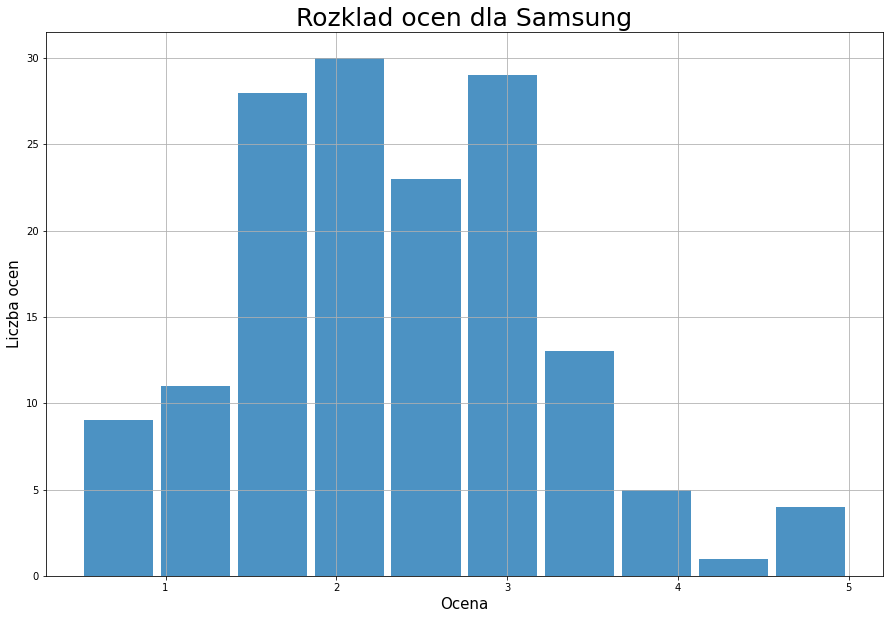

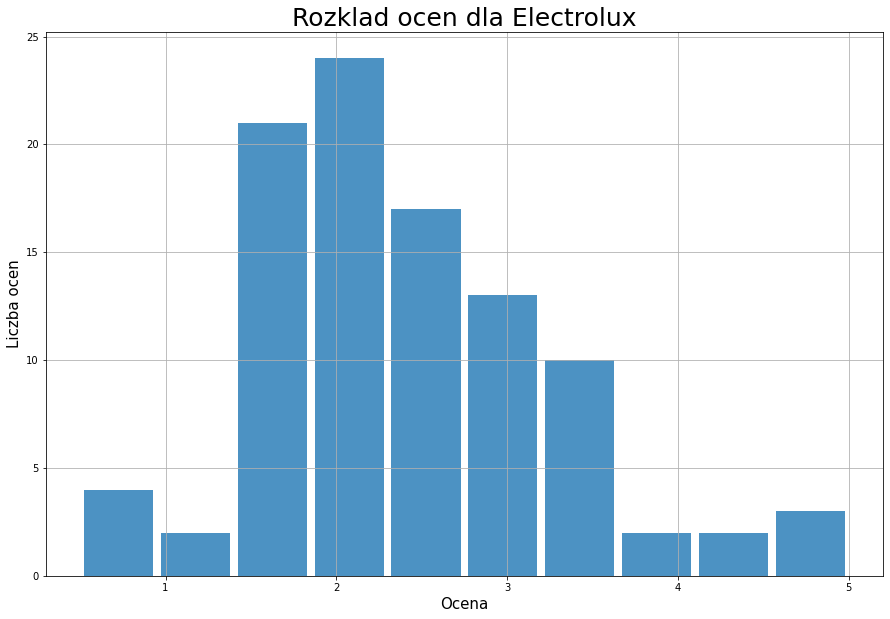

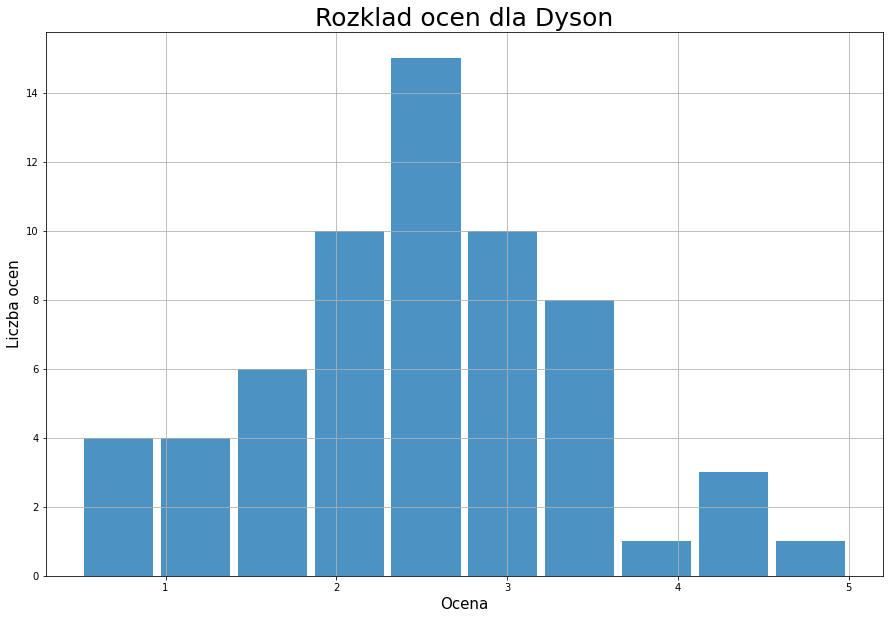

In [44]:
# Histogram dla poszczegolnych marek wg oceny

for i in range(0, len(df_lst)):
    plot_hist(df_lst[i], 'Ocena', bins=10, title=f"Rozklad ocen dla {marki[i]}", x_label="Ocena", y_label="Liczba ocen")

In [45]:
# for i in range(0, len(df_lst)):
#     plot_hist(df_lst[i], 'Ocena', bins=10, title=f"Rozklad ocen dla {marki[i]}", x_label="Ocena", y_label="Liczba ocen")